In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [29]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [30]:
X

array([[ -8.4010432 ,   8.02343268],
       [-10.23021978,   7.08556996],
       [ -3.00962477,  -4.33127335],
       ...,
       [  7.24745312,   7.29239092],
       [ -4.03633969,  -2.80030218],
       [  7.9384693 ,   9.93352145]], shape=(1000, 2))

In [31]:
y

array([1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 0,
       2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1,
       1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 0,
       1, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1,
       1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2,

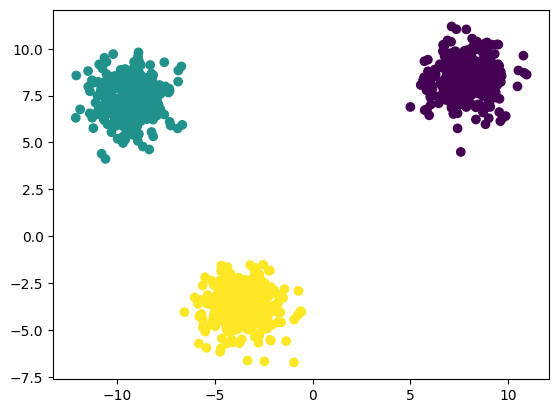

In [32]:
plt.scatter(X[:,0],X[:,1],c=y)

In [39]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [44]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [45]:
from sklearn.cluster import KMeans

In [46]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [47]:
wcss

[1340.000000000001,
 550.4856458568837,
 34.739670838595394,
 30.0459330811325,
 25.715077524633593,
 24.219074871219682,
 18.355450904733832,
 16.99333673712466,
 16.075039300612953,
 13.98668373736296]

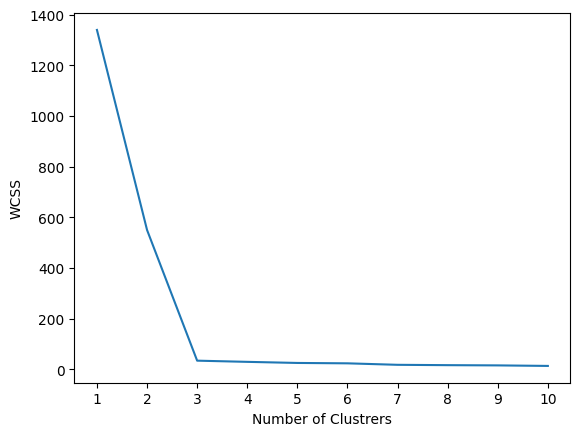

In [48]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [49]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [50]:
kmeans.fit_predict(X_train_scaled)

array([0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2,
       2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 0,
       1, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 1, 0, 2, 2,

In [51]:
y_pred=kmeans.predict(X_test_scaled)

In [54]:
y_pred

array([0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 0,
       0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1,
       2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2,
       2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0,
       2, 1, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2,
       2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1,
       2, 0, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 0,
       0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2,

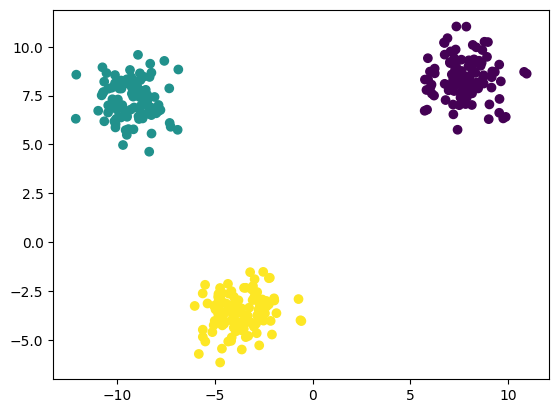

In [55]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [56]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [57]:
## kneelocator
!pip install kneed


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
from kneed import KneeLocator

In [64]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [65]:
kl.elbow

np.int64(3)

In [66]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [67]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [68]:
silhouette_coefficients

[np.float64(0.6412234250855389),
 np.float64(0.8719112079718978),
 np.float64(0.6967149772045713),
 np.float64(0.5322036240489467),
 np.float64(0.5216188548988595),
 np.float64(0.36180540044885334),
 np.float64(0.3459124702142613),
 np.float64(0.35342069676476917),
 np.float64(0.3282926007797668)]

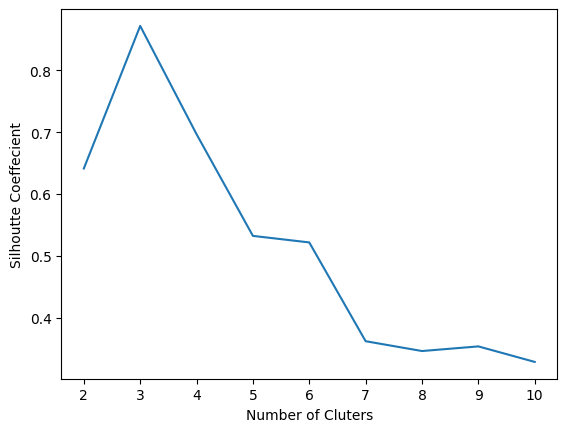

In [69]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()